In [11]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"

In [12]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    return inputs, targets

def plot_history(history):
    plt.close()
    fig, axs = plt.subplots(2)

    #create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train_accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")

    #create error subplot
    axs[1].plot(history.history["loss"], label="train_error")
    axs[1].plot(history.history["val_loss"], label="test_error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Eval")

    plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1690)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)               

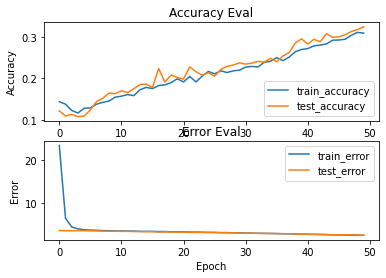

In [13]:
# load data
inputs, targets = load_data(DATASET_PATH)

# split data into train and test sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

# build the network architecture
model = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

    #hidden layers
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), # rele prevents vanishing gradient unlike sigmoid
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),


    #output layer
    keras.layers.Dense(10, activation="softmax"), # 10 nuerons representing the 10 available genres. Softmax normalizes for multiclass
])

# compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

#### HANDLE Overfitting
"""
    1. Simpler architecture
        remove layers
        decrease number of nuerons
        no universal rule
    2. Audio data augmentation
        artificially increase # of samples
        apply transformation to audio files
            pitch shift
            time stretching 
            adding background noise
    3. Early stopping 
        choose rules to stop the training
            choose number of epochs based on separation of train and teset error
    4. Dropout - randomly drop neurons while training to increase network robustness
        this works because the network can't rely on single neurons too much
        dropout probability 0.1-0.5 as %
    5. Regularization - L1 or L2 (L2 probably better for audio)
        add penalty to the error function
        minimize absolute value of weights
        robust to outliers
        generates simpler model

"""



# train network
history = model.fit(inputs_train, targets_train, 
    validation_data=(inputs_test, targets_test),
    epochs=50,
    batch_size=32) # mini batch is a subset of the dataset (16-128 samples). Accurate but also not too slow or memory intensive

# plot accuracy and error over the epochs
plot_history(history)